In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 44s 4us/step


In [7]:
print('length of x_train:',len(x_train))
print('length of x_test:',len(x_test))
print('length of y_train:',len(y_train))
print('length of y_test:',len(y_test))

length of x_train: 60000
length of x_test: 10000
length of y_train: 60000
length of y_test: 10000


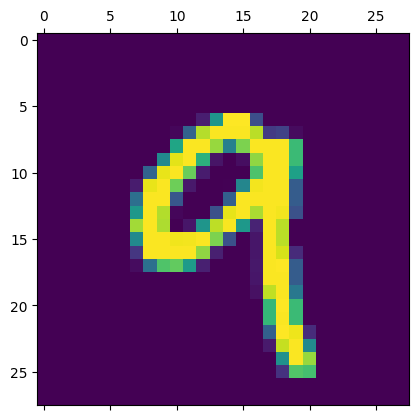

In [14]:
plt.matshow(x_train[110]);

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_train_flattened=x_train.reshape(len(x_train),28*28)

In [20]:
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [34]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),
                      activation='sigmoid')
])
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

In [35]:
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 9.6708 - accuracy: 0.8413
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.1688 - accuracy: 0.8782
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.6504 - accuracy: 0.8824
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.6115 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4350 - accuracy: 0.8867


In [36]:
x_train_flattened.shape

(60000, 784)

In [37]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 5.5688 - accuracy: 0.9010


[5.568798542022705, 0.9010000228881836]

In [39]:
y_predicted=model.predict(x_test_flattened)

313/313 [==============================] - 1s 688us/step


In [41]:
y_predicted[0]

array([1.4664307e-38, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 6.6126287e-01, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [50]:
np.argmax(y_predicted[70])

2

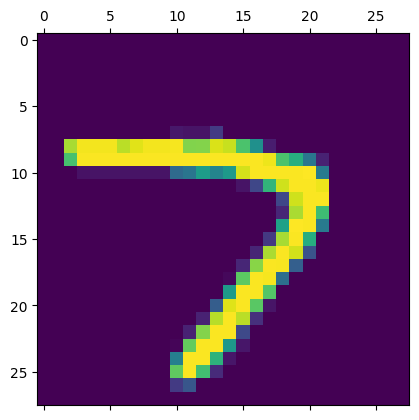

In [52]:
plt.matshow(x_test[70])

In [55]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [56]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [59]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    0,    1,    2,    3,    0,    0,    0,    0],
       [   3, 1129,    2,    0,    0,    1,    0,    0,    0,    0],
       [ 323,  327,  363,    5,   10,    2,    1,    0,    0,    1],
       [ 209,  161,  271,  367,    1,    1,    0,    0,    0,    0],
       [  63,   48,  154,  146,  563,    0,    1,    0,    7,    0],
       [ 266,   28,   98,  251,   39,  201,    4,    0,    4,    1],
       [ 333,   71,  336,   55,   50,   70,   43,    0,    0,    0],
       [  59,   56,  140,  464,   85,   55,    0,  169,    0,    0],
       [  93,  138,  434,  145,   37,   88,    7,    9,   23,    0],
       [  37,   54,  100,  414,  355,    8,    1,   37,    2,    1]])>

#Scaling

In [61]:
x_train=x_train/255
x_test=x_test/255

In [62]:
x_train_flattened=x_train.reshape(len(x_train),28*28)

In [63]:
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [64]:
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2946 - accuracy: 0.8186
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8991 - accuracy: 0.8715
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6200 - accuracy: 0.8845
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4531 - accuracy: 0.8959
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3611 - accuracy: 0.9065


In [65]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3224 - accuracy: 0.9139


[0.3223665654659271, 0.9139000177383423]

In [66]:
y_predicted=model.predict(x_test_flattened)

313/313 [==============================] - 0s 630us/step


In [67]:
np.argmax(y_predicted[70])

7

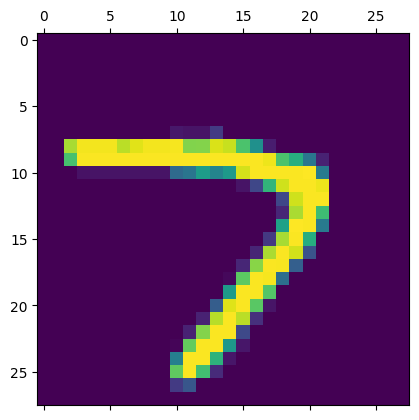

In [68]:
plt.matshow(x_test[70])

In [70]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [71]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [73]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    1,    0,    3,    5,    1,    2,    0],
       [   0, 1111,    2,    3,    0,    3,    4,    0,   12,    0],
       [  12,    9,  900,   24,   16,    0,   11,   14,   41,    5],
       [   4,    1,   17,  918,    1,   23,    3,   13,   20,   10],
       [   2,    2,    3,    1,  917,    1,   11,    2,    7,   36],
       [  12,    8,    2,   42,   15,  758,   15,    7,   23,   10],
       [  19,    3,    7,    1,    9,   15,  901,    0,    3,    0],
       [   2,   18,   22,    3,   10,    0,    0,  930,    4,   39],
       [  12,   11,    8,   25,   11,   27,   11,   11,  845,   13],
       [  11,    7,    3,   13,   47,   10,    0,   20,    6,  892]])>